In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# make dataframe for a csv file
df = pd.read_csv('/Users/harshikantdubey/Documents/ALL_python/train_data.xlsx - Sheet1.csv')

In [5]:
#number of missing values from each column
df.isnull().sum()

Lat                      91
Long_                    91
Deaths                 1558
Case_Fatality_Ratio      44
dtype: int64

In [170]:
df.head()

,Lat,Long_,Deaths,CFR
0,33.93911,67.709953,NaN,0.037792
1,41.15330,20.168300,NaN,0.010772
2,28.03390,1.659600,NaN,0.025369
3,42.50630,1.521800,165.0,0.003455
4,-11.20270,17.873900,NaN,0.018364


In [21]:
#remove the rows with missing Lat or Long_ values
df1 = df.dropna(subset=['Lat', 'Long_'])
df1.isnull().sum()

Lat                       0
Long_                     0
Deaths                 1546
Case_Fatality_Ratio       3
dtype: int64

In [143]:
df4 = df1[df1['Deaths'].isna()]
df4 = df4[df4['Case_Fatality_Ratio'] <= 100]
# Rename the column
df4.rename(columns={'Case_Fatality_Ratio': 'CFR'}, inplace=True)
# Convert CFR from percentage to decimal
df4['CFR'] = df4['CFR'] / 100

In [146]:
df4.describe()

,Lat,Long_,Deaths,CFR
count,1545.000000,1545.000000,1545.000000,1545.000000
mean,33.217296,-48.711421,95.796062,0.014324
std,17.677230,68.972811,32.396700,0.011082
min,-52.368000,-157.971218,-16.758694,0.000667
25%,31.151979,-89.124676,75.185135,0.008680
50%,36.757005,-80.551706,96.270027,0.012124
75%,41.887536,-0.753300,117.574646,0.016723
max,68.000042,178.065000,190.724182,0.180745


In [ ]:
df2=df1.dropna(subset=['Deaths'])
df2.isnull().sum()

In [81]:
df3=df2.dropna(subset=['Case_Fatality_Ratio'])
df3.isnull().sum()

Lat                    0
Long_                  0
Deaths                 0
Case_Fatality_Ratio    0
dtype: int64

In [82]:
df3.describe()

,Lat,Long_,Deaths,Case_Fatality_Ratio
count,2376.000000,2376.000000,2376.000000,2376.000000
mean,37.340808,-85.668856,72.900253,1.634670
std,9.378423,37.720456,54.780025,12.304408
min,-71.949900,-178.116500,0.000000,0.000000
25%,34.079243,-98.685451,26.000000,0.949021
50%,38.205416,-91.086644,62.000000,1.347789
75%,42.330518,-83.249587,114.000000,1.768518
max,71.706900,177.649300,200.000000,600.000000


In [83]:
#df3 is the complete and accurate data for tranning 
df3 = df3[df3['Case_Fatality_Ratio'] <= 100]
# Rename the column
df3.rename(columns={'Case_Fatality_Ratio': 'CFR'}, inplace=True)
# Convert CFR from percentage to decimal
df3['CFR'] = df3['CFR'] / 100

In [148]:
df3.head()

,Lat,Long_,Deaths,CFR
3,42.5063,1.5218,165.0,0.003455
5,-71.9499,23.3470,0.0,0.000000
6,17.0608,-61.7964,146.0,0.016033
9,-35.4735,149.0124,138.0,0.000614
11,-12.4634,130.8456,84.0,0.000816


In [85]:
# Save df3 to a new CSV file
df3.to_csv('/Users/harshikantdubey/Documents/ALL_python/train_data_accurate_.csv', index=False)

# Replace 'path_to_new_file.csv' with your desired file path and name


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df3[['Lat', 'Long_','CFR']]
y = df3['Deaths']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for algorithms sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the resulting datasets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((1900, 3), (475, 3), (1900,), (475,))

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, mse, rmse


(34.43496842105263, 2037.7262877894736, 45.14118172787985)

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [122]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples per leaf
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider for split
}


In [123]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1   # Use all available cores for parallel processing
)


In [124]:
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=10

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=2)

In [125]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


In [126]:
best_model = random_search.best_estimator_

# Predict on the test set
y_pred_optimized = best_model.predict(X_test_scaled)

# Evaluate the optimized model
mae = mean_absolute_error(y_test, y_pred_optimized)
mse = mean_squared_error(y_test, y_pred_optimized)
rmse = mse ** 0.5

print(f"Optimized MAE: {mae}")
print(f"Optimized MSE: {mse}")
print(f"Optimized RMSE: {rmse}")

Optimized MAE: 34.91571464673521
Optimized MSE: 1982.781626183728
Optimized RMSE: 44.52843615246024


In [127]:
import joblib

# Save the model to a file
joblib.dump(best_model, "random_forest_deaths_model.pkl")

['random_forest_deaths_model.pkl']

In [128]:
# Load the model from the file
loaded_model = joblib.load("random_forest_deaths_model.pkl")

In [140]:
# Example input: Latitude, Longitude, CFR
new_data = [[40.06910,45.038200,0.001954365]]  # Replace with your values

# Standardize the input using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

In [141]:
# Predict deaths for the input
predicted_deaths = loaded_model.predict(new_data_scaled)
print("Predicted Deaths:", predicted_deaths[0])

Predicted Deaths: 32.448433223336544


In [136]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,         # Number of trees
    max_depth=6,              # Maximum depth of each tree
    learning_rate=0.1,        # Step size for weight updates
    subsample=0.8,            # Fraction of samples for each tree
    colsample_bytree=0.8,     # Fraction of features for each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")


MAE: 34.711915946947904
MSE: 1981.6247496249346
RMSE: 44.515443945050514


In [137]:
import joblib

# Save the XGBoost model and scaler
joblib.dump(xgb_model, "xgboost_deaths_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [139]:
# Load the model and scaler
loaded_xgb_model = joblib.load("xgboost_deaths_model.pkl")
scaler = joblib.load("scaler.pkl")

# Prepare new input data
new_data = [[40.06910,45.038200,0.001954365]]  # Example: Latitude, Longitude, CFR
new_data_scaled = scaler.transform(new_data)

# Predict using the loaded model
predicted_deaths_xgb = loaded_xgb_model.predict(new_data_scaled)
print(f"Predicted Deaths: {predicted_deaths_xgb[0]:.2f}")


Predicted Deaths: 36.89


In [145]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load("xgboost_deaths_model.pkl")  # Replace with your model file
scaler = joblib.load("scaler.pkl")              # Replace with your scaler file

# Filter rows with NaN in 'Deaths'
missing_deaths = df4[df4['Deaths'].isna()]

# Prepare input features (Latitude, Longitude, CFR)
features = missing_deaths[['Lat', 'Long_', 'CFR']]

# Scale the features
features_scaled = scaler.transform(features)

# Predict missing 'Deaths' values
predicted_deaths = model.predict(features_scaled)

# Fill missing 'Deaths' with predicted values
df4.loc[df4['Deaths'].isna(), 'Deaths'] = predicted_deaths

# Display updated DataFrame
print(df4)


            Lat       Long_      Deaths       CFR
0     33.939110   67.709953   96.535217  0.037792
1     41.153300   20.168300   92.669952  0.010772
2     28.033900    1.659600  131.677689  0.025369
4    -11.202700   17.873900  149.774506  0.018364
7    -38.416100  -63.616700   77.552696  0.013065
...         ...         ...         ...       ...
4010  14.058324  108.277199   90.384628  0.003747
4011  31.952200   35.233200   93.321938  0.008117
4013  15.552727   48.516388  140.445312  0.180745
4014 -13.133897   27.849332  126.261734  0.012016
4015 -19.015438   29.154857  125.552101  0.021682

[1545 rows x 4 columns]


,Lat,Long_,Deaths,CFR
count,1545.000000,1545.000000,1545.000000,1545.000000
mean,33.217296,-48.711421,95.796062,0.014324
std,17.677230,68.972811,32.396700,0.011082
min,-52.368000,-157.971218,-16.758694,0.000667
25%,31.151979,-89.124676,75.185135,0.008680
50%,36.757005,-80.551706,96.270027,0.012124
75%,41.887536,-0.753300,117.574646,0.016723
max,68.000042,178.065000,190.724182,0.180745


In [149]:
# Reset the index of both dataframes
df3_reset = df3.reset_index(drop=True)
df4_reset = df4.reset_index(drop=True)

# Concatenate the dataframes
combined_df = pd.concat([df3_reset, df4_reset], ignore_index=True)

# Display the combined DataFrame
print(combined_df)


            Lat       Long_      Deaths       CFR
0     42.506300    1.521800  165.000000  0.003455
1    -71.949900   23.347000    0.000000  0.000000
2     17.060800  -61.796400  146.000000  0.016033
3    -35.473500  149.012400  138.000000  0.000614
4    -12.463400  130.845600   84.000000  0.000816
...         ...         ...         ...       ...
3915  14.058324  108.277199   90.384628  0.003747
3916  31.952200   35.233200   93.321938  0.008117
3917  15.552727   48.516388  140.445312  0.180745
3918 -13.133897   27.849332  126.261734  0.012016
3919 -19.015438   29.154857  125.552101  0.021682

[3920 rows x 4 columns]


In [150]:
combined_df.isnull().sum()

Lat       0
Long_     0
Deaths    0
CFR       0
dtype: int64

In [151]:
combined_df.to_csv('/Users/harshikantdubey/Documents/ALL_python/train_data_with_deaths.csv', index=False)


In [155]:
data=combined_df.copy()

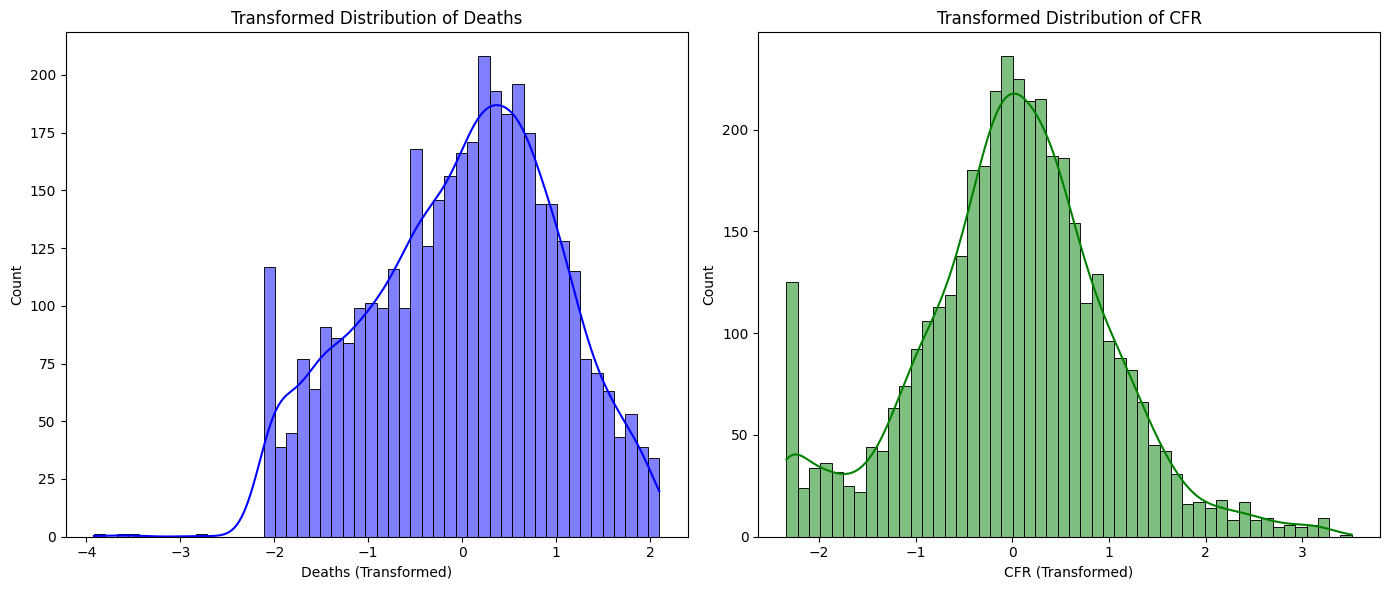

In [156]:
from sklearn.preprocessing import PowerTransformer

# Apply power transformation to handle skewness in Deaths and CFR
transformer = PowerTransformer(method='yeo-johnson', standardize=True)
data[['Deaths', 'CFR']] = transformer.fit_transform(data[['Deaths', 'CFR']])

# Re-plot the distributions after transformation
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Deaths'], bins=50, kde=True, color='blue')
plt.title('Transformed Distribution of Deaths')
plt.xlabel('Deaths (Transformed)')

plt.subplot(1, 2, 2)
sns.histplot(data['CFR'], bins=50, kde=True, color='green')
plt.title('Transformed Distribution of CFR')
plt.xlabel('CFR (Transformed)')

plt.tight_layout()
plt.show()


In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import joblib

# Assuming you have the combined DataFrame
combined_df1 = combined_df.reset_index(drop=True)

# Prepare the data
X = combined_df1[['Lat', 'Long_']]  # Features: Lat and Long_
y = combined_df1[['Deaths', 'CFR']]  # Targets: Deaths and CFR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for many models like XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# Create a MultiOutputRegressor with the XGBoost model
multioutput_model = MultiOutputRegressor(xgb_model)

# Train the model
multioutput_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = multioutput_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) or RMSE for both targets
mse_deaths = mean_squared_error(y_test['Deaths'], y_pred[:, 0])
rmse_deaths = np.sqrt(mse_deaths)

mse_cfr = mean_squared_error(y_test['CFR'], y_pred[:, 1])
rmse_cfr = np.sqrt(mse_cfr)

print(f'Mean Squared Error (Deaths): {mse_deaths}')
print(f'Root Mean Squared Error (Deaths): {rmse_deaths}')
print(f'Mean Squared Error (CFR): {mse_cfr}')
print(f'Root Mean Squared Error (CFR): {rmse_cfr}')



Mean Squared Error (Deaths): 1728.0381262333237
Root Mean Squared Error (Deaths): 41.56967796643755
Mean Squared Error (CFR): 5.8851251566796524e-05
Root Mean Squared Error (CFR): 0.007671456938991219


In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import joblib

# Assuming you have the combined DataFrame
combined_df = combined_df.reset_index(drop=True)

# Prepare the data
X = combined_df[['Lat', 'Long_']]  # Features: Lat and Long_
y = combined_df[['Deaths', 'CFR']]  # Targets: Deaths and CFR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for many models like XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# Create a MultiOutputRegressor with the XGBoost model
multioutput_model = MultiOutputRegressor(xgb_model)

# Set up hyperparameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__subsample': [0.8, 1.0],
    'estimator__colsample_bytree': [0.7, 0.9, 1.0]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=multioutput_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) or RMSE for both targets
mse_deaths = mean_squared_error(y_test['Deaths'], y_pred[:, 0])
rmse_deaths = np.sqrt(mse_deaths)

mse_cfr = mean_squared_error(y_test['CFR'], y_pred[:, 1])
rmse_cfr = np.sqrt(mse_cfr)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error (Deaths): {mse_deaths}')
print(f'Root Mean Squared Error (Deaths): {rmse_deaths}')
print(f'Mean Squared Error (CFR): {mse_cfr}')
print(f'Root Mean Squared Error (CFR): {rmse_cfr}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'estimator__colsample_bytree': 1.0, 'estimator__learning_rate': 0.01, 'estimator__max_depth': 7, 'estimator__n_estimators': 300, 'estimator__subsample': 0.8}
Mean Squared Error (Deaths): 1482.620551366289
Root Mean Squared Error (Deaths): 38.50481205468076
Mean Squared Error (CFR): 4.6948837771375986e-05
Root Mean Squared Error (CFR): 0.006851922195367953


In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Assuming you have the combined DataFrame
combined_df2 = combined_df.reset_index(drop=True)

# Prepare the data
X = combined_df2[['Lat', 'Long_']]  # Features: Lat and Long_
y = combined_df2[['Deaths', 'CFR']]  # Targets: Deaths and CFR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create a MultiOutputRegressor with the Random Forest model
multioutput_model_rf = MultiOutputRegressor(rf_model)

# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'estimator__n_estimators': [100, 200, 300, 500],
    'estimator__max_depth': [3, 5, 7, 10, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['auto', 'sqrt', 'log2'],
    'estimator__bootstrap': [True, False]
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=multioutput_model_rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1,  # Use all available CPUs
    scoring='neg_mean_squared_error'
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Best model from RandomizedSearchCV
best_model_rf = random_search.best_estimator_

# Make predictions with the best model
y_pred_rf = best_model_rf.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) or RMSE for both targets
mse_deaths_rf = mean_squared_error(y_test['Deaths'], y_pred_rf[:, 0])
rmse_deaths_rf = np.sqrt(mse_deaths_rf)

mse_cfr_rf = mean_squared_error(y_test['CFR'], y_pred_rf[:, 1])
rmse_cfr_rf = np.sqrt(mse_cfr_rf)

print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Mean Squared Error (Deaths) - Optimized Random Forest: {mse_deaths_rf}')
print(f'Root Mean Squared Error (Deaths) - Optimized Random Forest: {rmse_deaths_rf}')
print(f'Mean Squared Error (CFR) - Optimized Random Forest: {mse_cfr_rf}')
print(f'Root Mean Squared Error (CFR) - Optimized Random Forest: {rmse_cfr_rf}')



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'estimator__n_estimators': 100, 'estimator__min_samples_split': 2, 'estimator__min_samples_leaf': 4, 'estimator__max_features': 'log2', 'estimator__max_depth': None, 'estimator__bootstrap': True}
Mean Squared Error (Deaths) - Optimized Random Forest: 1436.309053540297
Root Mean Squared Error (Deaths) - Optimized Random Forest: 37.89866822911192
Mean Squared Error (CFR) - Optimized Random Forest: 4.313259949215887e-05
Root Mean Squared Error (CFR) - Optimized Random Forest: 0.006567541358237409


In [166]:
# Save the trained optimized Random Forest model and scaler for later use
joblib.dump(best_model_rf, 'random_forest_multioutput_optimized_deaths_cfr_model.pkl')
joblib.dump(scaler, 'scaler_rf_optimized.pkl')

['scaler_rf_optimized.pkl']

In [221]:
df6=pd.read_csv('/Users/harshikantdubey/Documents/ALL_python/test_points.xlsx - Sheet1.csv')

In [222]:
df6=df6.dropna(subset=['Lat','Long_'])

In [223]:
# Drop duplicate rows based on 'Lat' and 'Long_' columns
df6 = df6.drop_duplicates(subset=['Lat', 'Long_'])

# Verify that the duplicates are removed
print("Number of rows after dropping duplicates:", len(df6))


Number of rows after dropping duplicates: 981


In [230]:
import joblib
import pandas as pd

# Load the saved model and scaler
best_model_rf = joblib.load('random_forest_multioutput_optimized_deaths_cfr_model.pkl')
scaler = joblib.load('scaler_rf_optimized.pkl')

# Assuming df6 has 'Lat' and 'Long_' columns
X_df6 = df7[['Lat', 'Long_']]

# Scale the features (use the same scaler that was used during training)
X_df6_scaled = scaler.transform(X_df6)

# Make predictions for both 'Deaths' and 'CFR'
y_pred = best_model_rf.predict(X_df6_scaled)

# Create a DataFrame with predictions
predictions_df = pd.DataFrame(y_pred, columns=['Deaths', 'CFR'])

# Optionally, add predictions to df6 for convenience
df7['Predicted_Deaths'] = predictions_df['Deaths']
df7['Predicted_CFR'] = predictions_df['CFR']

# Show the updated dataframe
print(df7.head(23))


          Lat       Long_  Predicted_Deaths  Predicted_CFR
0   42.668582  -88.541631        105.649649       0.008877
1   44.470681  -88.965345        117.583413       0.010050
2   41.654987 -105.723541         49.731149       0.011737
3   42.972723 -105.508185         47.623864       0.014037
4   43.719307 -108.442317         51.652711       0.015322
5   42.961801 -106.797885         45.245320       0.012642
6   44.790489 -106.886239         59.003177       0.013852
7   41.287818 -110.547578         59.763034       0.007512
8    1.373333   32.290275        133.514737       0.016213
9   45.283500   34.200800        100.345056       0.024786
10  49.993500   36.230400         95.837803       0.021836
11  50.053000   30.766700         92.842685       0.020313
12  46.975000   31.994600         88.682154       0.022405
13  44.605400   33.522000         97.441464       0.023486
14  49.233100   28.468200         94.447457       0.020352
15  50.254700   28.658700         89.657161       0.0182

In [225]:
df6.describe()

,Lat,Long_,Predicted_Deaths,Predicted_CFR
count,981.000000,981.000000,958.000000,958.000000
mean,35.619019,-70.370781,82.440462,0.014023
std,13.846984,56.453781,32.950467,0.005998
min,-71.949900,-175.198200,0.000000,0.000000
25%,33.086588,-96.326056,59.249831,0.011016
50%,37.940907,-86.845176,86.989626,0.013904
75%,42.248070,-77.103699,105.484846,0.016630
max,66.830900,177.649300,153.285357,0.051257


In [226]:
print(df6[df6['Predicted_Deaths'].isnull()])  # Rows with missing Predicted_Deaths
print(df6[df6['Predicted_CFR'].isnull()])    # Rows with missing Predicted_CFR


            Lat       Long_  Predicted_Deaths  Predicted_CFR
981   42.668582  -88.541631               NaN            NaN
982   44.470681  -88.965345               NaN            NaN
983   41.654987 -105.723541               NaN            NaN
984   42.972723 -105.508185               NaN            NaN
985   43.719307 -108.442317               NaN            NaN
986   42.961801 -106.797885               NaN            NaN
987   44.790489 -106.886239               NaN            NaN
988   41.287818 -110.547578               NaN            NaN
989    1.373333   32.290275               NaN            NaN
990   45.283500   34.200800               NaN            NaN
991   49.993500   36.230400               NaN            NaN
992   50.053000   30.766700               NaN            NaN
993   46.975000   31.994600               NaN            NaN
994   44.605400   33.522000               NaN            NaN
995   49.233100   28.468200               NaN            NaN
996   50.254700   28.658

In [227]:
df6.to_csv('DF6.csv',index=True)

In [236]:
df6=df6.dropna(subset=['Predicted_Deaths','Predicted_CFR'])

In [228]:
import pandas as pd

# Create a dictionary with the given data
data = {
    'Lat': [42.66858202, 44.47068056, 41.65498705, 42.97272268, 43.71930657, 42.96180148, 
            44.79048913, 41.2878183, 1.373333, 45.2835, 49.9935, 50.053, 46.975, 44.6054, 
            49.2331, 50.2547, 18.4207, -51.7963, 49.2138, -7.9467, 52.1307, 6.4238, 15.552727],
    'Long_': [-88.54163073, -88.96534501, -105.7235415, -105.5081848, -108.4423174, -106.797885, 
              -106.8862389, -110.5475782, 32.290275, 34.2008, 36.2304, 30.7667, 31.9946, 33.522, 
              28.4682, 28.6587, -64.64, -59.5236, -2.1358, -14.3559, -3.7837, -66.5897, 48.516388]
}

# Create a DataFrame using the dictionary
df7 = pd.DataFrame(data)

# Display the new DataFrame
print(df7)


          Lat       Long_
0   42.668582  -88.541631
1   44.470681  -88.965345
2   41.654987 -105.723541
3   42.972723 -105.508185
4   43.719307 -108.442317
5   42.961801 -106.797885
6   44.790489 -106.886239
7   41.287818 -110.547578
8    1.373333   32.290275
9   45.283500   34.200800
10  49.993500   36.230400
11  50.053000   30.766700
12  46.975000   31.994600
13  44.605400   33.522000
14  49.233100   28.468200
15  50.254700   28.658700
16  18.420700  -64.640000
17 -51.796300  -59.523600
18  49.213800   -2.135800
19  -7.946700  -14.355900
20  52.130700   -3.783700
21   6.423800  -66.589700
22  15.552727   48.516388


In [237]:
# Combine df6 and df7
combined_df = pd.concat([df6, df7], ignore_index=True)

# Reset the index
combined_df.reset_index(drop=True, inplace=True)

# Display the combined dataframe
print(combined_df)


           Lat       Long_  Predicted_Deaths  Predicted_CFR
0    41.153300   20.168300         94.842722       0.010408
1   -71.949900   23.347000         77.621849       0.009810
2   -35.473500  149.012400         80.898611       0.003207
3   -34.928500  138.600700         85.366131       0.004286
4    47.516200   14.550100         69.068316       0.007257
..         ...         ...               ...            ...
976  49.213800   -2.135800         82.085761       0.003855
977  -7.946700  -14.355900         95.049831       0.012845
978  52.130700   -3.783700         72.557793       0.005696
979   6.423800  -66.589700         73.990745       0.010723
980  15.552727   48.516388        143.581728       0.046193

[981 rows x 4 columns]


In [238]:
combined_df.isnull().sum()

Lat                 0
Long_               0
Predicted_Deaths    0
Predicted_CFR       0
dtype: int64

In [240]:
combined_df['Predicted_Total_Cases'] = combined_df.apply(
    lambda row: row['Predicted_Deaths'] / row['Predicted_CFR'] if row['Predicted_CFR'] != 0 else np.nan, axis=1
)

In [242]:
combined_df['Predicted_Total_Cases'].fillna(0, inplace=True)

In [245]:
combined_df.to_csv('Prediction.csv',index=False)